# Visualizing Zombi Simulations
Phylustrator is designed to handle complex evolutionary scenarios like those generated by **Zombi**.
We will visualize:
1. The **Species Tree** as a chronogram.
2. **Transfers** as curved links between branches.
3. **Losses and Duplications** as markers along the lineages.

Total Transfers: 230
------------------------------
Tree has 39 named nodes.
Sample tree names: ['n8', 'n34', 'n32', 'n23', 'n11']
Sample Transfer: n14 -> 15 at t=2.022235072002291
Source 'n14' in tree? True
Dest '15' in tree? False
Node 'n14' time range: 1.4203701999999998 -> 1.9377942
Transfer time 2.022235072002291 inside range? False
------------------------------


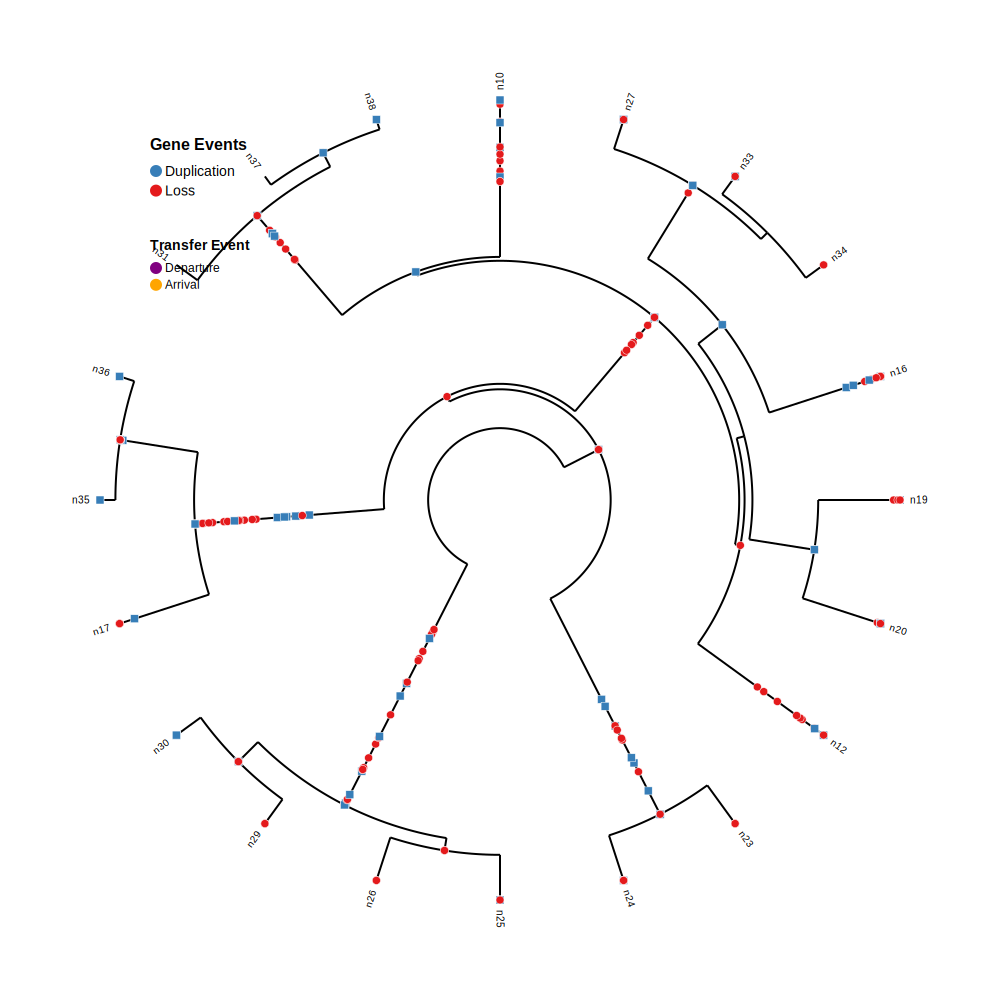

In [1]:
import phylustrator as ph
from phylustrator.parsers.zombi_parser import parse_zombi, ZombiParser

# 1. Parse Simulation Data
data = parse_zombi("../examples/data/zombi")

# --- DEBUGGING BLOCK ---
print(f"Total Transfers: {len(data.transfers)}")
print("-" * 30)

# Check Tree Node Names
tree_names = set(n.name for n in data.species_tree.traverse())
print(f"Tree has {len(tree_names)} named nodes.")
print(f"Sample tree names: {list(tree_names)[:5]}")

# Check Transfer Names
if not data.transfers.empty:
    sample_tr = data.transfers.iloc[0]
    src, dst = sample_tr["from"], sample_tr["to"]
    print(f"Sample Transfer: {src} -> {dst} at t={sample_tr['time']}")
    
    print(f"Source '{src}' in tree? {src in tree_names}")
    print(f"Dest '{dst}' in tree? {dst in tree_names}")

    # Check Time
    # Find the source node to check its time range
    if src in tree_names:
        s_node = data.species_tree.search_nodes(name=src)[0]
        # Ensure time_from_origin is set (the parser should have done this)
        t_end = getattr(s_node, "time_from_origin", "N/A")
        t_start = getattr(s_node.up, "time_from_origin", "N/A") if s_node.up else 0.0
        print(f"Node '{src}' time range: {t_start} -> {t_end}")
        print(f"Transfer time {sample_tr['time']} inside range? {t_start <= sample_tr['time'] <= t_end}")
print("-" * 30)
# -----------------------

# 2. Convert Events to Markers
specs = ZombiParser.get_branch_markers(
    data,
    event_types=["D", "L"],
    r=4.0, 
    stroke_width=0.5
)

# 3. Setup Style
r_style = ph.TreeStyle(
    radius=400,
    degrees=360,
    leaf_r=0,               
    node_r=0,               
    branch_stroke_width=2,
    rotation=90
)

# 4. Draw
r = ph.RadialTreeDrawer(data.species_tree, style=r_style)

# Plot Transfers
r.plot_transfers(
    data.transfers,
    mode="time",
    curve_type="C",
    filter_below=0.0,
    arc_intensity=50,
    stroke_width=4,
    opacity=0.6,
)

r.add_leaf_names(font_size=10)
r.draw()

# Add Markers
r.add_branch_shapes(specs)

# Add Legend
r.add_categorical_legend(
    {"Duplication": "#377EB8", "Loss": "#E41A1C"},
    title="Gene Events",
    x=-350, y=-350
)

r.add_transfer_legend(
    colors=("purple", "orange"),
    labels=("Departure", "Arrival"),
    x=-350, y=-250,
    font_size=12
)

r.d

Number of transfers parsed: 230
First 5 transfers:
  from  to      time  freq family
0  n14  15  2.022235   1.0     32
1   n1   2  2.095697   1.0     50
2  n10  11  2.616631   1.0     50
3  n26  37  3.132973   1.0     50
4  n12  13  2.036830   1.0     67


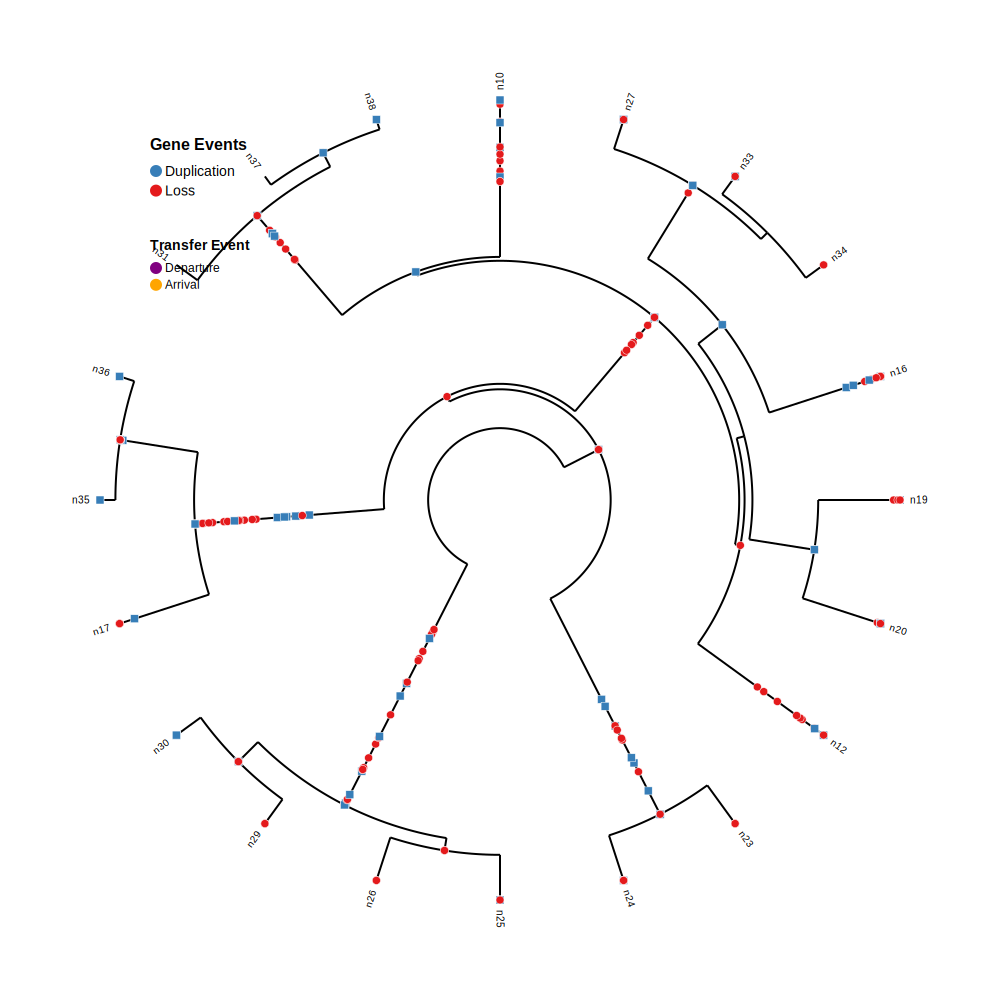

In [1]:
import phylustrator as ph
from phylustrator.parsers.zombi_parser import parse_zombi, ZombiParser

# 1. Parse Simulation Data
data = parse_zombi("../examples/data/zombi")

# DEBUG: Check if transfers were parsed correctly
print(f"Number of transfers parsed: {len(data.transfers)}")
if not data.transfers.empty:
    print("First 5 transfers:")
    print(data.transfers.head())
else:
    print("No transfers found! Check parser logic or input files.")

# 2. Convert Events to Markers
# Note: Using standardized parameter 'r' instead of 'size'
specs = ZombiParser.get_branch_markers(
    data,
    event_types=["D", "L"],
    r=4.0, 
    stroke_width=0.5
)

# 3. Setup Style
# Note: Using standardized keys (leaf_r, node_r, branch_stroke_width)
r_style = ph.TreeStyle(
    radius=400,
    degrees=360,
    leaf_r=0,               
    node_r=0,               
    branch_stroke_width=2,
    rotation=90
)

# 4. Draw
r = ph.RadialTreeDrawer(data.species_tree, style=r_style)

# Plot Transfers
r.plot_transfers(
    data.transfers,
    mode="time",        # Uses Zombi time
    curve_type="C",
    filter_below=0.0,
    arc_intensity=50,
    stroke_width=4,
    opacity=0.6,
)

r.add_leaf_names(font_size=10)
r.draw()

# Add Markers (Duplications/Losses)
r.add_branch_shapes(specs)

# Add Legend
r.add_categorical_legend(
    {"Duplication": "#377EB8", "Loss": "#E41A1C"},
    title="Gene Events",
    x=-350, y=-350
)

# Add Lateral Gene Transfers Legend
r.add_transfer_legend(
    colors=("purple", "orange"),
    labels=("Departure", "Arrival"),
    x=-350, y=-250,
    font_size=12
)

r.d

In [5]:
r.save_png("../examples/figures/zombi.png", scale=3)